In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Specify the path to your CSV file
df = pd.read_csv('iris.csv')
# View the first few rows of the dataframe
print(df.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [73]:
df.shape


(150, 5)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [77]:
# Features (X) - All columns except 'variety' using drop()
X = df.drop('variety', axis=1) # Drop the 'variety' column to get the features
# Target (y) - The 'variety' column using drop()
y = df['variety']
print(X)
print(y)
print(f"Number of rows and columns in X is: {X.shape}")
print(f"Number of rows and columns in y is: {y.shape}")


     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object
Number of rows and columns in X is: (150, 4)
Number

In [78]:
from sklearn.model_selection import train_test_split # Import train_test_split␣here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=None)
# Initialize the Naïve Bayes model
model = GaussianNB()
# Train the model on the training set
model.fit(X_train, y_train)

GaussianNB()

In [79]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [80]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naïve Bayes Classifier: {accuracy * 100:.2f}%")

Accuracy of Naïve Bayes Classifier: 96.67%


In [81]:
# Optionally, print predictions vs actual values
print("\nPredictions:", y_pred)
print("Actual values:", y_test.values)


Predictions: ['Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Virginica' 'Virginica' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Versicolor' 'Setosa'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica']
Actual values: ['Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Virginica' 'Virginica' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Setosa'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica']


In [82]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]


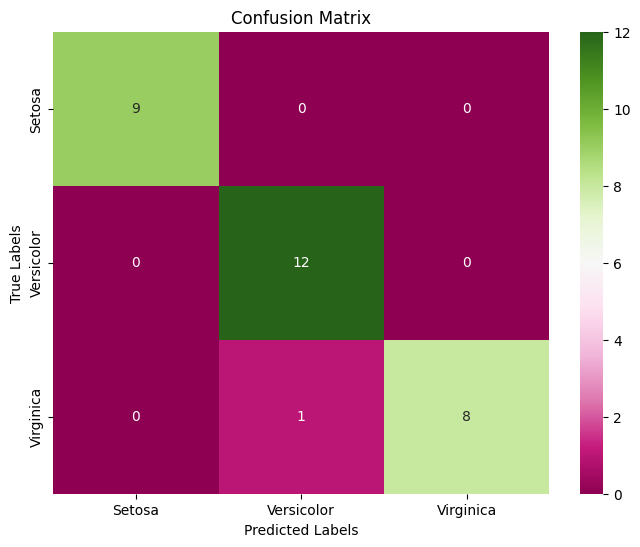

In [83]:
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', xticklabels=y.unique(),yticklabels=y.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [84]:
# For the first class (Setosa, index 0), second class (Versicolor, index 1),third class (Virginica, index 2)
TP = cm[0, 0] # Setosa correctly classified
FP = cm[0, 1] # Setosa incorrectly classified as Versicolor
TN = cm[1, 1] + cm[1, 2] # Versicolor and Virginica correctly classified
FN = cm[1, 0] # Versicolor incorrectly classified as Setosa

In [85]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
# Compute error rate
error_rate = 1 - accuracy
# Precision, Recall for class Setosa (as an example, but you can compute for other classes too)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0 # Avoid division by zero
recall = TP / (TP + FN) if (TP + FN) != 0 else 0 # Avoid division by zero
# Print the results
print("\nMetrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision (for Setosa): {precision * 100:.2f}%")
print(f"Recall (for Setosa): {recall * 100:.2f}%")


Metrics:
Accuracy: 96.67%
Error Rate: 3.33%
Precision (for Setosa): 100.00%
Recall (for Setosa): 100.00%
